In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
def regModel(x, *args):
    if len(args)==3:
        return args[0] * np.exp(-args[1] * x) + args[2]
    if len(args)==2:
        return args[0] * np.exp(-args[1] * x)

In [3]:
machine_type = 'pump'
data_type= 'speed'
df = pd.read_csv(
        'https://raw.githubusercontent.com/ivanokhotnikov/effmap_demo/master/data/data.csv', index_col='#')
data=df[df['type']==f'{machine_type.capitalize()}'].sample(frac=1)
x=data['displacement'].values
y=data[data_type].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=np.random.RandomState(seed=np.random.randint(1000)),shuffle=True)
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train.reshape((x_train.size, 1)))
poly_reg.fit(x_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [5]:
guess_two_params = [1e2, 1e-2]
cSpeedPumps_two_params, covSpeedPumps = curve_fit(regModel, x_train, y_train, guess_two_params)
guess_three_params = [1e2, 1e-2, 1e-2]
cSpeedPumps_three_params, covSpeedPumps = curve_fit(regModel, x_train, y_train, guess_three_params)

In [6]:
x_cont=np.linspace(.2*np.amin(x_train),1.2*np.amax(x_train),num=100)
fig = go.Figure()
fig.add_scatter(x=x_train, y=y_train, mode='markers',name='Data')
fig.add_scatter(x=x_cont,y=lin_reg.predict(poly_reg.fit_transform(x_cont.reshape(x_cont.size,1))),
mode='lines',name='Polynomial')
fig.add_scatter(x=x_cont, y=regModel(x_cont,*cSpeedPumps_two_params), mode='lines',name='Exponential')
fig.add_scatter(x=x_cont, y=regModel(x_cont,*cSpeedPumps_three_params), mode='lines',name='Linear-exponential')
fig.update_layout(
    title=f'EDA of the {machine_type} {data_type} data',
    width=700,
    height=500,
    xaxis=dict(
        title=f'{machine_type.capitalize()} displacement, cc/rev',
        showline=True,
        linecolor='black',
        mirror=True,
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.25,
        linewidth=0.5,
        range=[0, round(1.1 * max(x_train), -2)]
    ),
    yaxis=dict(
        title=f'{machine_type.capitalize()} {data_type}, rpm' if data_type == 'speed' else f'{machine_type.capitalize()} {data_type}, kg',
        showline=True,
        linecolor='black',
        mirror=True,
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.25,
        linewidth=0.5,
        range=[0, round(1.2 * max(y_train), -2)]
    ),
    plot_bgcolor='rgba(255,255,255,1)',
    paper_bgcolor='rgba(255,255,255,0)',
    showlegend=True,
)
fig.show()

In [7]:
machine_type = 'motor'
data_type= 'speed'
data=df[df['type']==f'{machine_type.capitalize()}'].sample(frac=1)
x=data['displacement'].values
y=data[data_type].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=np.random.RandomState(seed=np.random.randint(1000)),shuffle=True)
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train.reshape((x_train.size, 1)))
poly_reg.fit(x_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

cSpeedMotors_two_params, _ = curve_fit(regModel, x_train, y_train, guess_two_params)
cSpeedMotors_three_params, _ = curve_fit(regModel, x_train, y_train, guess_three_params)
x_cont=np.linspace(.2*np.amin(x_train),1.2*np.amax(x_train),num=100)
fig = go.Figure()
fig.add_scatter(x=x_train, y=y_train, mode='markers',name='Data')
fig.add_scatter(x=x_cont,y=lin_reg.predict(poly_reg.fit_transform(x_cont.reshape(x_cont.size,1))),
mode='lines',name='Polynomial')
fig.add_scatter(x=x_cont, y=regModel(x_cont,*cSpeedPumps_two_params), mode='lines',name='Exponential')
fig.add_scatter(x=x_cont, y=regModel(x_cont,*cSpeedPumps_three_params), mode='lines',name='Linear-exponential')
fig.update_layout(
    title=f'EDA of the {machine_type} {data_type} data',
    width=700,
    height=500,
    xaxis=dict(
        title=f'{machine_type.capitalize()} displacement, cc/rev',
        showline=True,
        linecolor='black',
        mirror=True,
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.25,
        linewidth=0.5,
        range=[0, round(1.2 * max(x_train), -2)]
    ),
    yaxis=dict(
        title=f'{machine_type.capitalize()} {data_type}, rpm' if data_type == 'speed' else f'{machine_type.capitalize()} {data_type}, kg',
        showline=True,
        linecolor='black',
        mirror=True,
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.25,
        linewidth=0.5,
        range=[0, round(1.1 * max(y_train), -2)]
    ),
    plot_bgcolor='rgba(255,255,255,1)',
    paper_bgcolor='rgba(255,255,255,0)',
    showlegend=True,
)
fig.show()

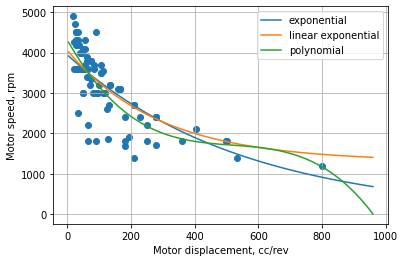

In [8]:
plt.scatter(x, y)
plt.plot(x_cont, regModel(x_cont,*cSpeedPumps_two_params),label='exponential')
plt.plot(x_cont, regModel(x_cont,*cSpeedPumps_three_params),label='linear exponential')
plt.plot(x_cont,lin_reg.predict(poly_reg.fit_transform(x_cont.reshape(x_cont.size,1))),label='polynomial')
plt.xlabel('Motor displacement, cc/rev')
plt.ylabel('Motor speed, rpm')
plt.legend()
plt.grid()